# Geospatial Insights into Water Availability and Infrastructure Performance

## Business understanding



#### *Objective:*
The primary business goal is to *predict the operational status* of waterpoints in Tanzania, classifying them into one of two categories:
1. *Functional* - Fully operational and providing water as intended.
2. *Non-functional* - Not operational and failing to provide water.

#### *Why It Matters:*
1. *Efficient Resource Allocation:* 
   - Predicting waterpoint conditions allows stakeholders (The Tanzanian Ministry of Water, NGOs) to allocate resources efficiently by prioritizing repairs and maintenance.
2. *Improved Accessibility to Water:*
   - Ensuring functional waterpoints in rural and urban areas is crucial for providing clean water to communities, improving public health, and reducing waterborne diseases.
3. *Cost Optimization:*
   - By proactively predicting failures, unnecessary repair costs can be avoided, and funds can be channeled to more critical interventions.
4. *Sustainability:*
   - Understanding patterns in failures helps in better planning for future installations, improving waterpoint durability.

---

#### *Key Stakeholders:*
1. *Government Agencies* (Tanzanian Ministry of Water):
   - Responsible for policy-making and infrastructure maintenance.
2. *NGOs and Charities:*
   - Focused on improving access to clean water.
3. *Local Communities:*
   - Beneficiaries of operational waterpoints.
4. *Donors and Funders:*
   - Interested in the impact of their investments in water infrastructure.

---

#### *Problem description:*
The dataset provides a variety of features that capture the physical attributes, installation details, geographic location, and usage patterns of the waterpoints. These variables can help answer questions such as:
1. *What factors contribute most to waterpoint failures?*
2. *Are certain geographic areas more prone to non-functional waterpoints?*
3. *How do management and funding affect waterpoint longevity?*
4. *Can the age of a waterpoint (construction year) predict its condition?*

---

#### *Expected Outcome:*
A machine learning model that:
1. Accurately predicts the operational status of a waterpoint.
2. Identifies key factors affecting functionality.
3. Provides actionable insights for maintaining and repairing waterpoints.

---

#### *Potential Challenges:*
1. *Data Quality:* Missing or inconsistent entries in key variables (e.g., funder, construction year).
2. *Class Imbalance:* If most waterpoints are functional, predicting minority classes (e.g., non-functional) can be challenging.
3. *Geographic and Temporal Variability:* Different regions may have unique issues (e.g., drought, poor maintenance) that complicate predictions.
4. *Interpretability:* Translating complex model outputs into actionable insights for stakeholders.

---

#### *Key Deliverables:*
1. *Classification Model:* A robust algorithm to predict waterpoint status.
2. *Feature Analysis Report:* Insights into which factors most influence waterpoint conditions.
3. *Dashboard or Visualization Tools:* To enable stakeholders to view and act on predictions and insights.

## Data Understanding

In [ ]:
# Import necessary modules for data understanding
import pandas as pd
import numpy as np

In [3]:
# Load the datasets
data1 =pd.read_csv('Data/Train_predictors.csv')
data2 =pd.read_csv('Data/Train_labels.csv')
Test_data =pd.read_csv('Data/Test_predictors.csv')

# Merge data1 and data2 using the id as the refrence variable
Train_data_labels = pd.merge(data2,data1,how='left')


In [4]:
Train_data_labels.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [5]:
# Check info about the object variables in the data
Train_data_labels.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   status_group           59400 non-null  object
 1   date_recorded          59400 non-null  object
 2   funder                 55765 non-null  object
 3   installer              55745 non-null  object
 4   wpt_name               59400 non-null  object
 5   basin                  59400 non-null  object
 6   subvillage             59029 non-null  object
 7   region                 59400 non-null  object
 8   lga                    59400 non-null  object
 9   ward                   59400 non-null  object
 10  public_meeting         56066 non-null  object
 11  recorded_by            59400 non-null  object
 12  scheme_management      55523 non-null  object
 13  scheme_name            31234 non-null  object
 14  permit                 56344 non-null  object
 15  extraction_type    

In [6]:
# Check info 
Train_data_labels.select_dtypes(include='number').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 59400 non-null  int64  
 1   amount_tsh         59400 non-null  float64
 2   gps_height         59400 non-null  int64  
 3   longitude          59400 non-null  float64
 4   latitude           59400 non-null  float64
 5   num_private        59400 non-null  int64  
 6   region_code        59400 non-null  int64  
 7   district_code      59400 non-null  int64  
 8   population         59400 non-null  int64  
 9   construction_year  59400 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 5.0 MB


In [7]:
# Investigate the response variable
Train_data_labels.status_group.value_counts()


functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

class imbalance present in the response variable 

In [8]:
# subset functional needs repair from the dataset
Train_data_labels=Train_data_labels.loc[Train_data_labels['status_group'] !='functional needs repair'].copy()

## Data Cleaning
- Check for missing values and imputing them
- Checking for duplicates
- Drop irrelevant columns
- Check for outliers and handling them in the data



In [9]:
# Import modules to use for data cleaning
import seaborn as sns
import matplotlib.pyplot as plt

### 1). Missing values

In [10]:
# Check for missing values
missing_val =Train_data_labels.isna().sum()
missing_val[missing_val>0]

funder                3198
installer             3215
subvillage             370
public_meeting        3178
scheme_management     3654
scheme_name          26162
permit                2756
dtype: int64

Most of the columns with missing values are objects. For columns with more than 20% missing values we will drop otherwise replace with value `mising`.

### 2). Duplicates

In [11]:
# Check for duplicates
Train_data_labels.duplicated().sum()


0

The Tanzania water pumps dataset does not contain duplicated data

In [12]:
Train_data_labels.columns

Index(['id', 'status_group', 'amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name',
       'num_private', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

### 3). Dropping Irrelevant columns

In [13]:
# Drop Columns 
columns_drop = ['id','scheme_name','num_private','subvillage','lga','ward','recorded_by','scheme_name',
                'construction_year','extraction_type','extraction_type_group','management','payment_type','quality_group',
                'quantity_group','source', 'source_type','waterpoint_type']

new_data = Train_data_labels.drop(columns=columns_drop).copy()


For the purpose of interpretability of the model and following the principle of pharsimony. I chose to drop the above columns based on the following reasons:
* Columns that had been repeated but with different column names
* Categorical variable that had many distinct values in our data
* Columns with higher number of rows with missing values 

### 4). Imputing missing values

In [14]:
# Performing data imputation to replace missing values
missing_val =new_data.isna().sum()
missing_val[missing_val>0]


funder               3198
installer            3215
public_meeting       3178
scheme_management    3654
permit               2756
dtype: int64

In [15]:
new_data.fillna("missing",inplace=True)
new_data.isna().sum()

status_group             0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
basin                    0
region                   0
region_code              0
district_code            0
population               0
public_meeting           0
scheme_management        0
permit                   0
extraction_type_class    0
management_group         0
payment                  0
water_quality            0
quantity                 0
source_class             0
waterpoint_type_group    0
dtype: int64

### 5). Investigating outliers

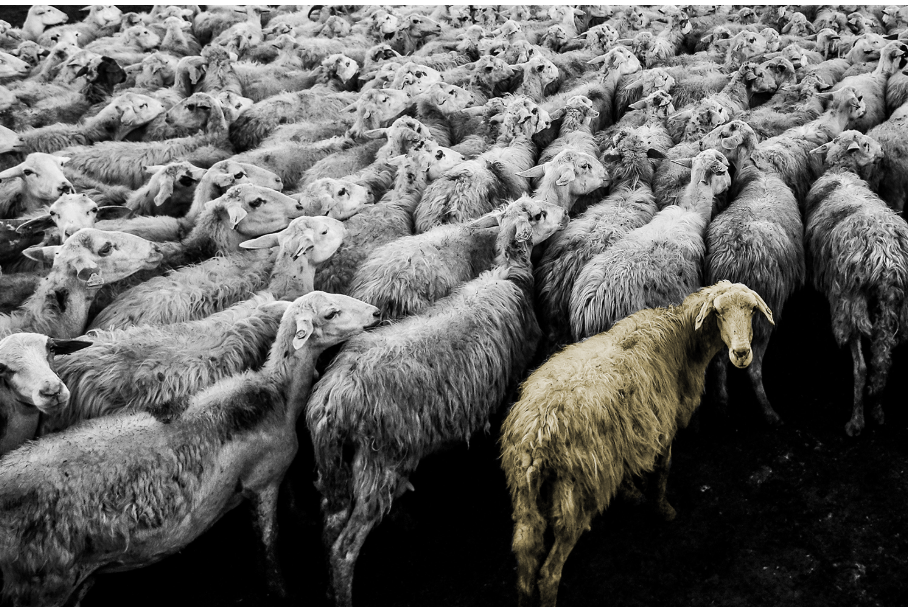

In [16]:
# ....Investigate outliers
new_data.select_dtypes(include='number').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55083 entries, 0 to 59399
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   amount_tsh     55083 non-null  float64
 1   gps_height     55083 non-null  int64  
 2   longitude      55083 non-null  float64
 3   latitude       55083 non-null  float64
 4   region_code    55083 non-null  int64  
 5   district_code  55083 non-null  int64  
 6   population     55083 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 3.4 MB


<AxesSubplot:xlabel='population', ylabel='Count'>

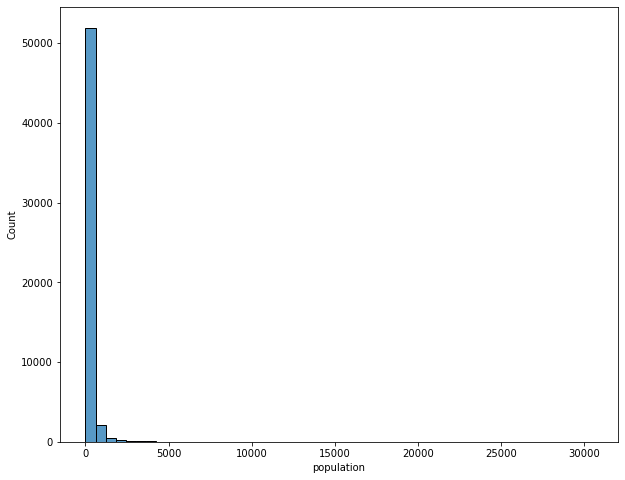

In [22]:
numeric_data = new_data.select_dtypes(include='number')
plt.figure(figsize=(10,8))
sns.histplot(numeric_data,x='population',bins=50)

## Exploratory Data Analysis


For this section we will try and be one with the data🙏🏿.By experimenting different statistical tests and techniques we aim to get a deeper understanding of the data as well as insights that we will use for modelling. To do so let's summon the greatest explorer of our time...


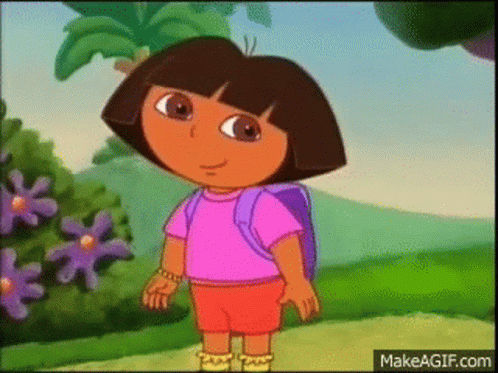





- Normalize/Standardize the data
- Validate data accuracy (Making sure our data aligns with real-world scenario)


In [18]:
# Import helper functions to help visualize our data
from functions import plot_category,plot_category

### 1). Univariate Analysis

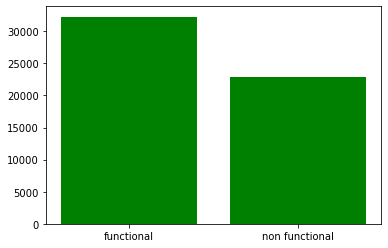

In [66]:
# Investigating the response variable 
res =new_data.status_group.value_counts()
plt.bar(x=res.index,height=res.values,color='green');


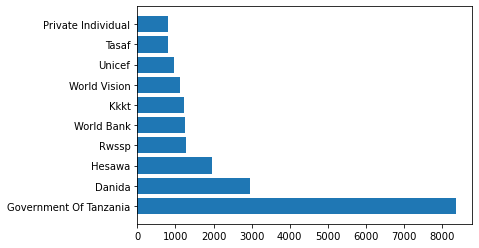

In [67]:
# Investigate the top ten funders
cat_plot =new_data.funder.value_counts(ascending=False).drop(labels='missing').head(10)
cat_plot
plt.barh(y=cat_plot.index,width=cat_plot.values);


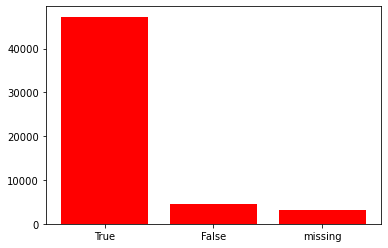

In [77]:
# Investigate Public meetings
meet =new_data.public_meeting.value_counts()
plt.bar(x=[str(x) for x in meet.index],height=meet.values,color='red');


### 2).Bivariate Visualization

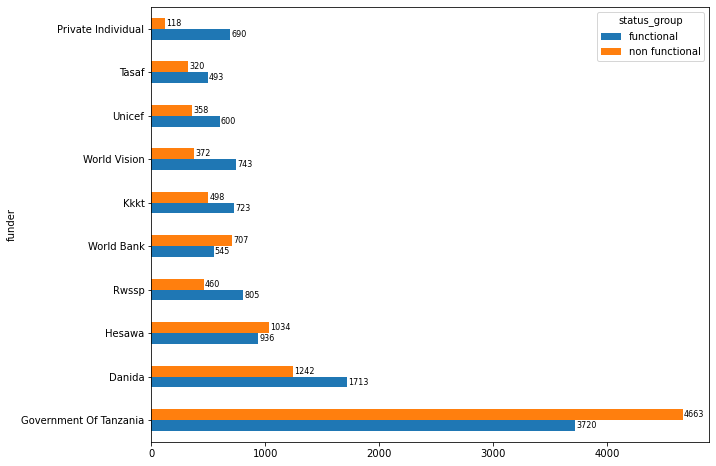

In [ ]:
# since we have alot of levels in the categorical variable funder
# filtering for the top ten funders in the data could aid in visualizing
rows_filter=list(cat_plot.index) # create a list of funders we want to keep
plot_data=new_data.apply(lambda row:row[new_data['funder'].isin(rows_filter)])


crosstab_data =pd.crosstab(plot_data['funder'],plot_data['status_group'])

# Sort funders by the total number of water points
crosstab_data['Total'] = crosstab_data.sum(axis=1)
crosstab_data = crosstab_data.sort_values(by='Total', ascending=False).drop(columns=['Total'])


ax=crosstab_data.plot(kind='barh',stacked=False,figsize=(10,8));

# Add labels to the bars
# Manually add labels to the bars
for i, container in enumerate(ax.patches):
    # Each bar has a width corresponding to its value
    value = container.get_width()  # Bar value
    # Position the label
    ax.text(value + 10, container.get_y() + container.get_height() / 2,  # Slightly offset from the bar edge
            f'{int(value)}', va='center', fontsize=8)


In [58]:
# chi-square test
from scipy import stats

crosstab= pd.crosstab(plot_data['funder'],plot_data['status_group'])
print(stats.chi2_contingency(crosstab))

(902.8940071619397, 1.472005828590181e-188, 9, array([[1562.70202507, 1392.29797493],
       [4433.20848602, 3949.79151398],
       [1041.80135005,  928.19864995],
       [ 645.70530376,  575.29469624],
       [ 427.29720347,  380.70279653],
       [ 668.97396336,  596.02603664],
       [ 429.94136933,  383.05863067],
       [ 506.62217936,  451.37782064],
       [ 662.09913211,  589.90086789],
       [ 589.64898746,  525.35101254]]))


- The very high Chi-square statistic (902.8940071619397) and extremely small p-value(1.472005828590181e-188) and a degree of freedom of 9 suggest a strong association between the two categorical variables in the  contingency table.

- The largest contributors to the Chi-square statistic are likely Government of Tanzania, DANIDA, and Private Individual, given their high absolute counts and discrepancies between functional and non-functional water points.

 **Insights:** 
- Funders like Government of Tanzania and HESAWA may require further analysis to understand why their non-functional water points are so high despite large investments.
- Private Individuals might benefit from technical or financial support to improve their success rate in maintaining functional water points.
- Focus on funders with a higher proportion of functional water points (e.g., DANIDA ) could offer insights into best practices.



In [ ]:
# Public meeting and Status group
crosstab2 =